In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# Change filename if required
df = pd.read_csv("CKD.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (399, 25)
   age         bp sg  al  su     rbc        pc         pcc          ba  \
0  2.0  76.459948  c   3   0  normal  abnormal  notpresent  notpresent   
1  3.0  76.459948  c   2   0  normal    normal  notpresent  notpresent   
2  4.0  76.459948  a   1   0  normal    normal  notpresent  notpresent   
3  5.0  76.459948  d   1   0  normal    normal  notpresent  notpresent   
4  5.0  50.000000  c   0   0  normal    normal  notpresent  notpresent   

          bgr  ...        pcv            wc        rc  htn  dm  cad  appet  \
0  148.112676  ...  38.868902   8408.191126  4.705597   no  no   no    yes   
1  148.112676  ...  34.000000  12300.000000  4.705597   no  no   no    yes   
2   99.000000  ...  34.000000   8408.191126  4.705597   no  no   no    yes   
3  148.112676  ...  38.868902   8408.191126  4.705597   no  no   no    yes   
4  148.112676  ...  36.000000  12400.000000  4.705597   no  no   no    yes   

     pe  ane classification  
0   yes   no            yes  
1

In [3]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             399 non-null    float64
 1   bp              399 non-null    float64
 2   sg              399 non-null    object 
 3   al              399 non-null    float64
 4   su              399 non-null    float64
 5   rbc             399 non-null    object 
 6   pc              399 non-null    object 
 7   pcc             399 non-null    object 
 8   ba              399 non-null    object 
 9   bgr             399 non-null    float64
 10  bu              399 non-null    float64
 11  sc              399 non-null    float64
 12  sod             399 non-null    float64
 13  pot             399 non-null    float64
 14  hrmo            399 non-null    float64
 15  pcv             399 non-null    float64
 16  wc              399 non-null    float64
 17  rc              399 

In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [5]:
# Fill missing values
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
X = df.drop('classification', axis=1)
y = df['classification']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest (Final Model)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\nModel Accuracies:")
print("Logistic Regression:", acc_lr)
print("Decision Tree:", acc_dt)
print("Random Forest:", acc_rf)



Model Accuracies:
Logistic Regression: 0.9875
Decision Tree: 0.975
Random Forest: 1.0


In [15]:
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [16]:
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



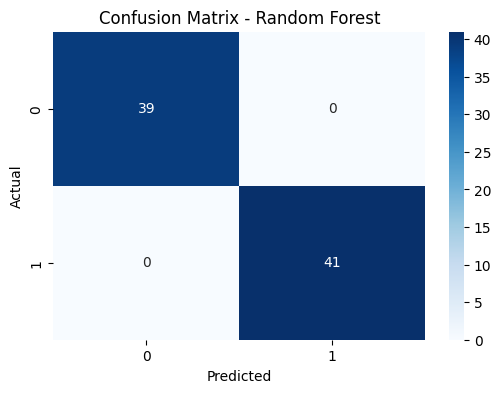

In [17]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

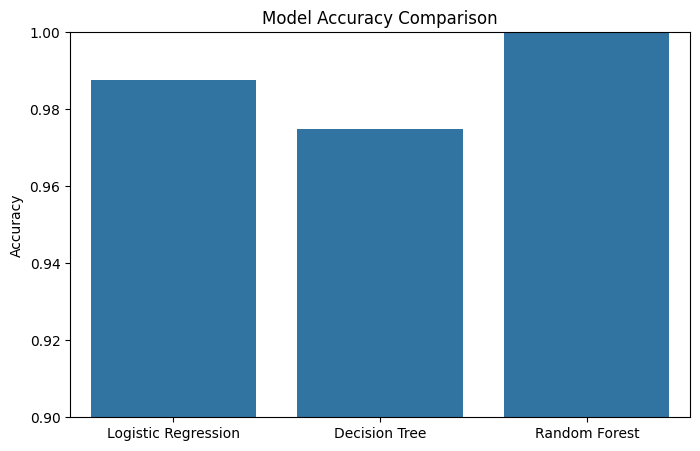

In [18]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [acc_lr, acc_dt, acc_rf]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.title("Model Accuracy Comparison")
plt.show()


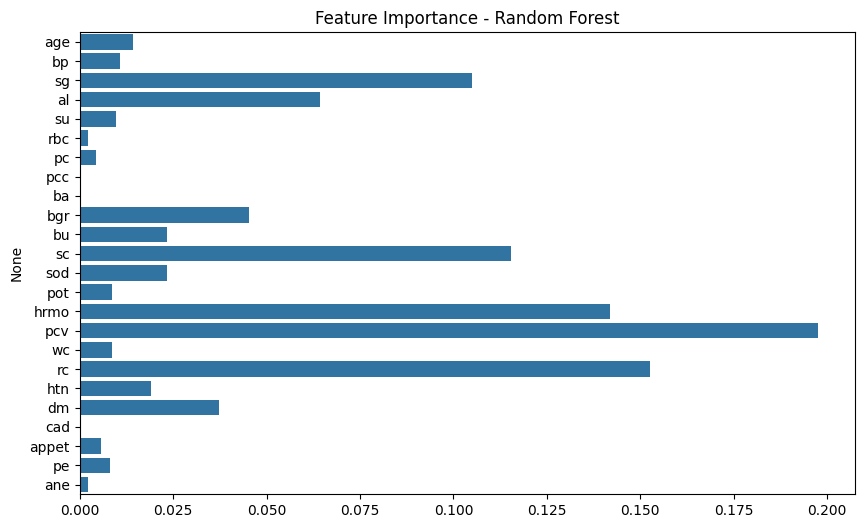

In [19]:
feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [20]:
print("\nFinal Model Selected: Random Forest Classifier")
print("Reason: Highest accuracy, robustness, and better generalization")


Final Model Selected: Random Forest Classifier
Reason: Highest accuracy, robustness, and better generalization
